In [26]:
suppressPackageStartupMessages(source("/Users/klagattu/Downloads/tcrpheno_analysis_github/utils.R"))
setwd("/Users/klagattu/Downloads/tcrpheno_analysis_github/data")

### [Figure 2a-c: schematic]

## Figure 2d

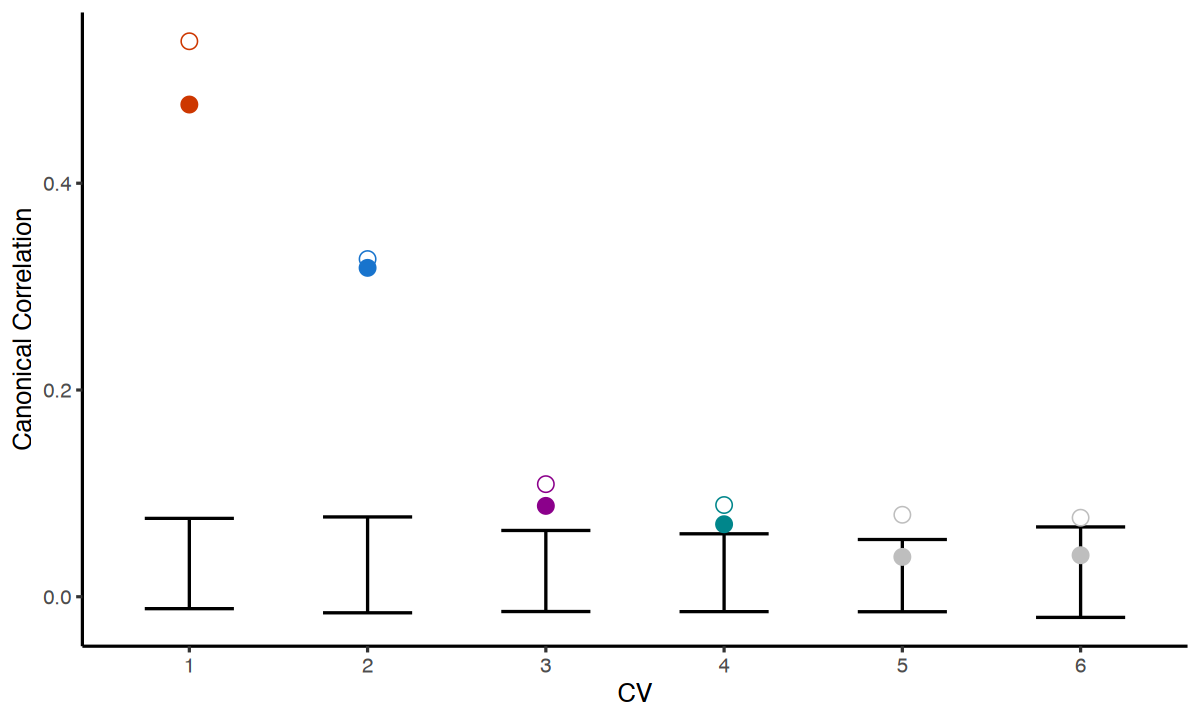

In [51]:
load("CCA_soln_0606.rds")
load("cca_perms_0606_sumstats.RData")
tp = data.frame(CV = rep(seq(1:6), 2), cor=c(res$cor[1:6], cor_test[1:6]), tt = c(rep("train", 6), rep("test", 6)))
options(repr.plot.width=10, repr.plot.height=6)
g = ggplot()
g = g + geom_errorbar(aes(x=factor(tp$CV[tp$tt=="test"]), ymin=test_mins[1:6], ymax=test_maxs[1:6]), width=0.5, show.legend=FALSE, size=0.7)
g = g + geom_point(aes(x=factor(tp$CV), y=tp$cor,  shape=tp$tt, color=factor(tp$CV)), size=4, show.legend = FALSE) + theme_classic(base_size=15) + scale_color_manual(values=c("orangered3", "dodgerblue3", "darkmagenta", "turquoise4", "gray", "gray"))
g = g + ylab("Canonical Correlation") + scale_shape_manual(values=c(19,1))
g + xlab("CV") 

In [41]:
panel.prot = c("AB_TCR_Va7_2", "AB_CD161", "AB_KLRG1_MAFA", "AB_CD4", "AB_CD8", "AB_CD45RO", "AB_CD45RA")
panel.gene = c("IKZF2", "RTKN2", "CCR7", "SELL", "FOXP3")

In [42]:
exp = readRDS("combat_expnorm_incNKT.rds")
prot = readRDS("combat_protnorm_incNKT.rds")

In [44]:
load("CCA_soln_0606.rds")
yscores = data.frame(res$variates$Y)
yscores$cell = rownames(res$variates$Y)
yscores$X1 = -yscores$X1
yscores$X3 = -yscores$X3
R = matrix(nrow=4, ncol = length(panel.prot)+length(panel.gene))
P = matrix(nrow=4, ncol = length(panel.prot)+length(panel.gene))
for (i in 1:length(panel.prot)){
  df = data.frame(cell = colnames(prot), v = prot[which(rownames(prot)==panel.prot[i]),])
  yscores = left_join(yscores, df)
  for (j in 1:4){
    test = cor.test(yscores$v, yscores[,j])
    R[j,i] = test$estimate
    P[j,i] = test$p.value
  }
  yscores$v <- NULL
}
for (i in 1:length(panel.gene)){
  df = data.frame(cell = colnames(exp), v = exp[which(rownames(exp)==panel.gene[i]),])
  yscores = left_join(yscores, df)
  for (j in 1:4){
    test = cor.test(yscores$v, yscores[,j])
    R[j,i+length(panel.prot)] = test$estimate
    P[j,i+length(panel.prot)] = test$p.value
  }
  yscores$v <- NULL
}
rownames(R) = paste("CV", seq(1,4), sep="")
colnames(R) = c(panel.prot, panel.gene)

Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"
Joining, by = "cell"


## Figure 2e

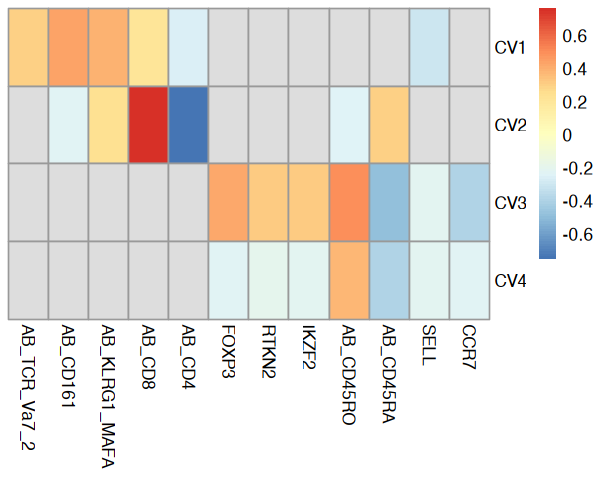

In [48]:
R_tp = R
R_tp[P>(0.05/(6358+192))] <- NA
R_tp[abs(R_tp)<0.2] <- NA
ord = c("AB_TCR_Va7_2", "AB_CD161", "AB_KLRG1_MAFA","AB_CD8", "AB_CD4", "FOXP3", "RTKN2", "IKZF2",  "AB_CD45RO", "AB_CD45RA", "SELL", "CCR7")
options(repr.plot.width=5, repr.plot.height=4)
pheatmap(R_tp[,as.character(ord)], cluster_rows = FALSE, cluster_cols=FALSE, heatmap_legend_param = list(
  legend_direction = "horizontal"))

## Figure 2f

Joining, by = "cell"
Joining, by = "cell"


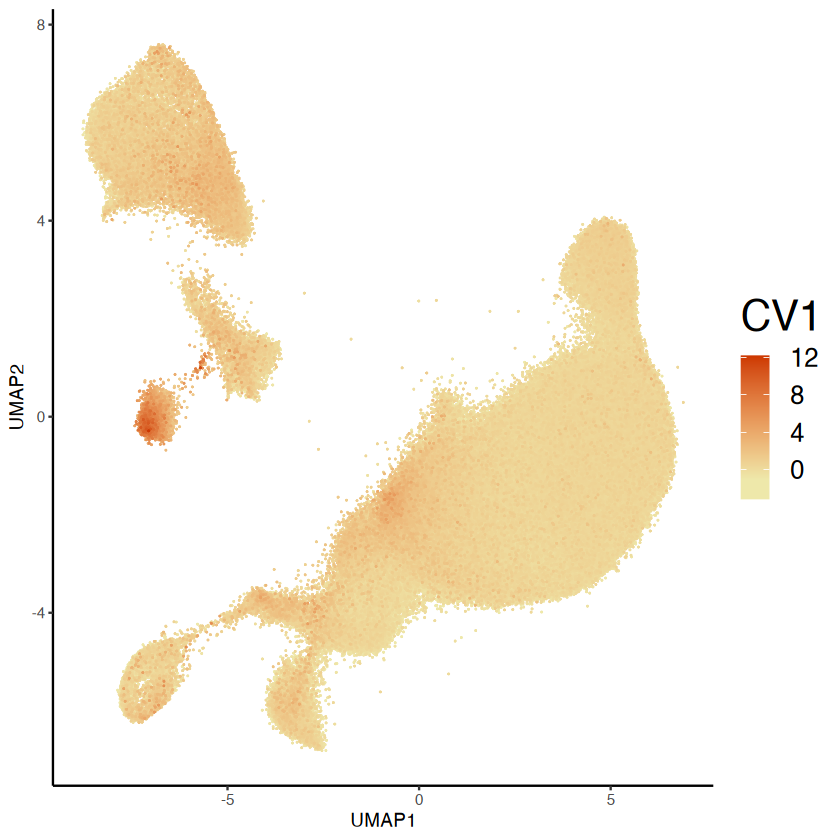

In [8]:
sref = readRDS("sref_combat_full_authTplusNKT_20hPCs_tcrfilt0607_nvargenes200_sampTH1.instTH0.5.poolTH0.5_origuwot.rds")
ren_mapped_file = "ren_mappedtocombat_full_authTplusNKT__500g_20hPCs_tcrfilt0607_nvargenes200_theta10505.rds"
load("CCA_soln_0606.rds")
options(repr.plot.width=7, repr.plot.height=7)
get_ccascore_umap(sref, ren_mapped_file, res, 1, mp=-1, rev=TRUE, order=TRUE)

## Figure 2g

Joining, by = "cell"
Joining, by = "cell"


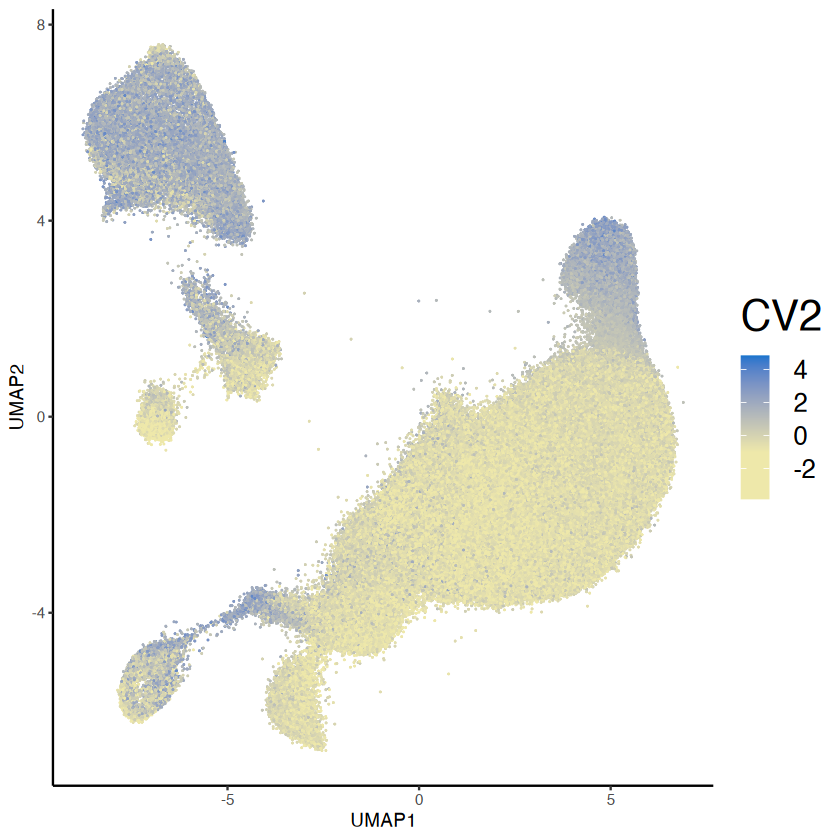

In [10]:
options(repr.plot.width=7, repr.plot.height=7)
get_ccascore_umap(sref, ren_mapped_file, res, 2, mp=-1)

## Figure 2h

Joining, by = "cell"
Joining, by = "cell"


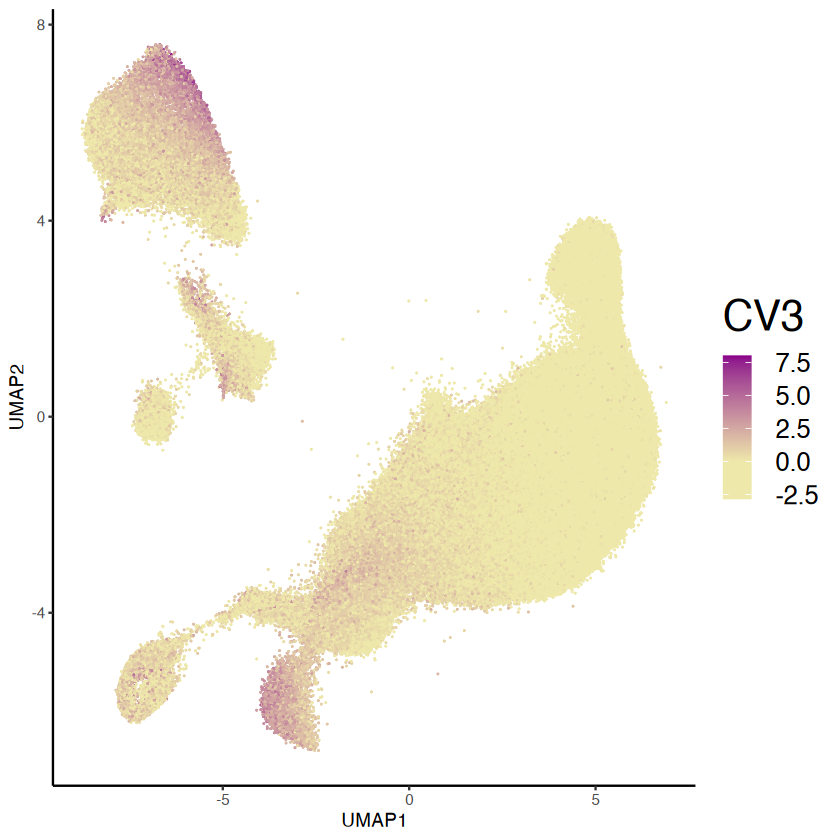

In [11]:
options(repr.plot.width=7, repr.plot.height=7)
get_ccascore_umap(sref, ren_mapped_file, res, 3, mp=0, rev=TRUE)

## Figure 2i

Joining, by = "cell"
Joining, by = "cell"


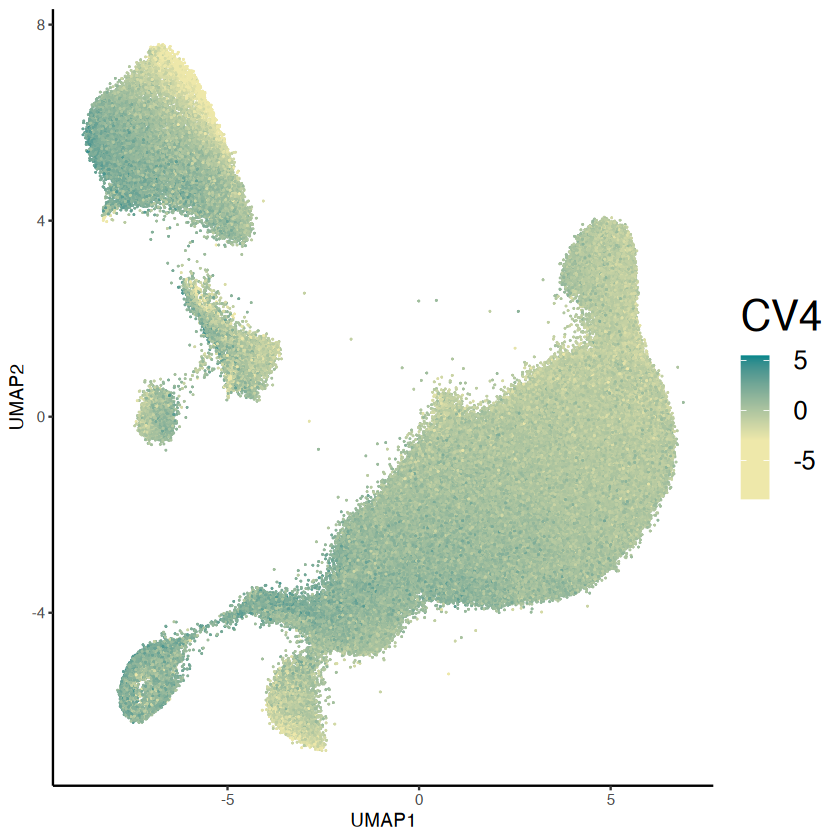

In [12]:
options(repr.plot.width=7, repr.plot.height=7)
get_ccascore_umap(sref, ren_mapped_file, res, 4, mp=-3)

In [31]:
targets <- read.csv("COMBATrenmerged_cellstatetargets_fix0414_fixnames0606.csv")
tcrcors = aggregate_tcr_cors_simp("tcrcors_linridge0606_combatren_justX")
tcrcors = tcrcors[tcrcors$p.value<0.05/nrow(tcrcors),] 

## Figure 2j: *TCR-innate*

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



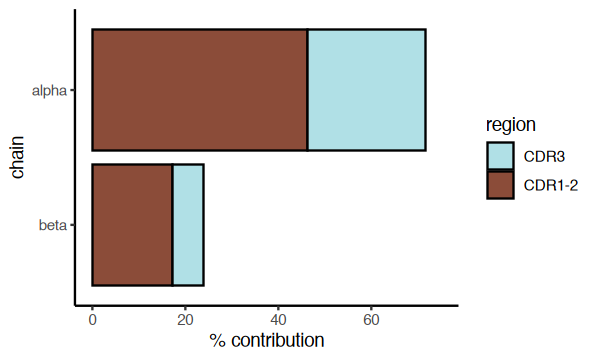

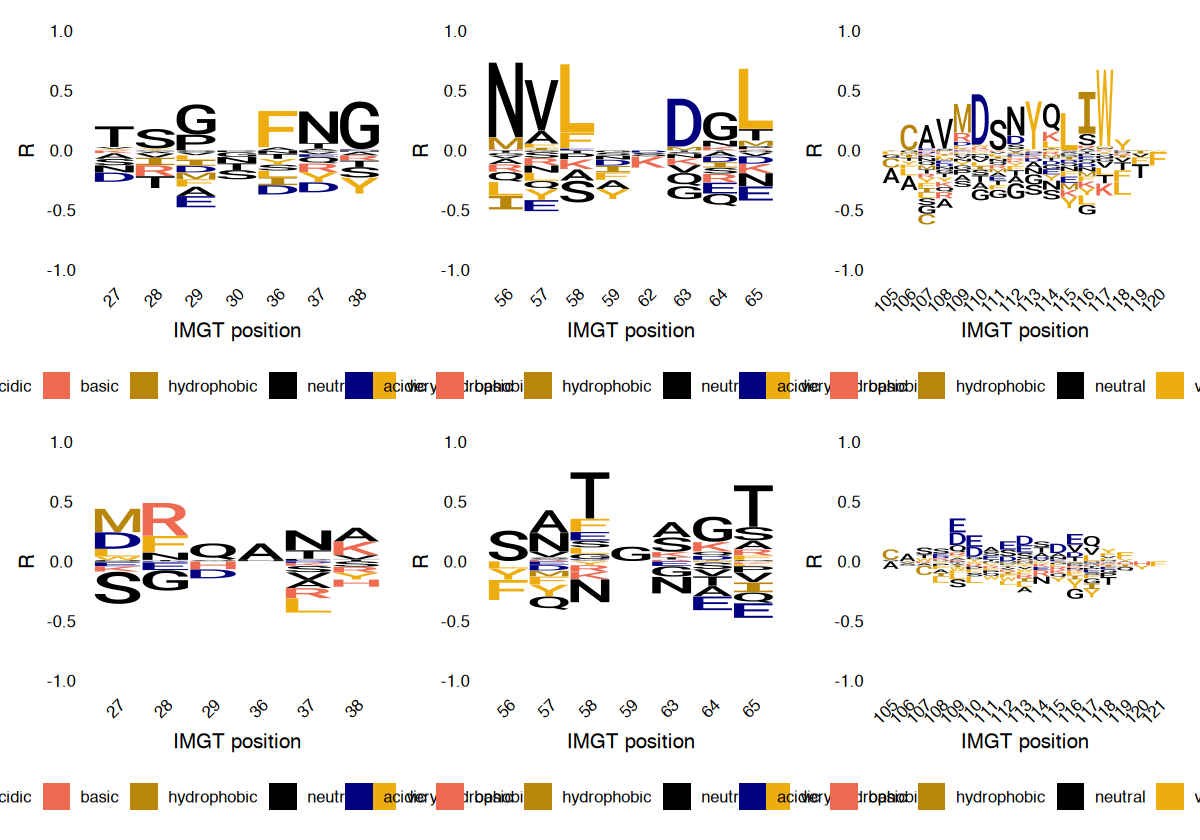

In [38]:
tar1 = arrange_score_comps("target1", cdrscore_dir = "glmnet_predscorebyCDR_0606", fullscore_dir = "glmnetres_4targets_fixnames_0604")
options(repr.plot.width=5, repr.plot.height=3)
plot_var_comp(get_var_comps_LR(tar1))
options(repr.plot.width=10, repr.plot.height=7)
viz_all_posTCRcors(tcrcors[tcrcors$CV=="X1",], ymin=-1, ymax=1)

## Figure 2k: *TCR-CD8*

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



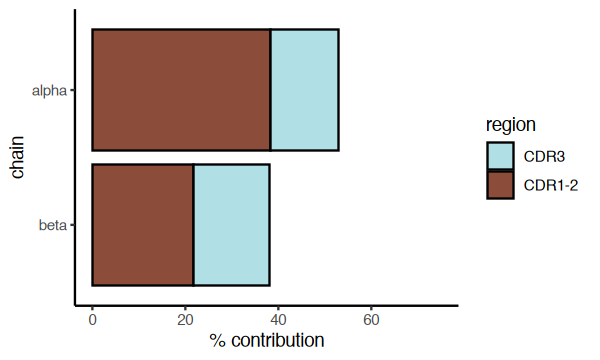

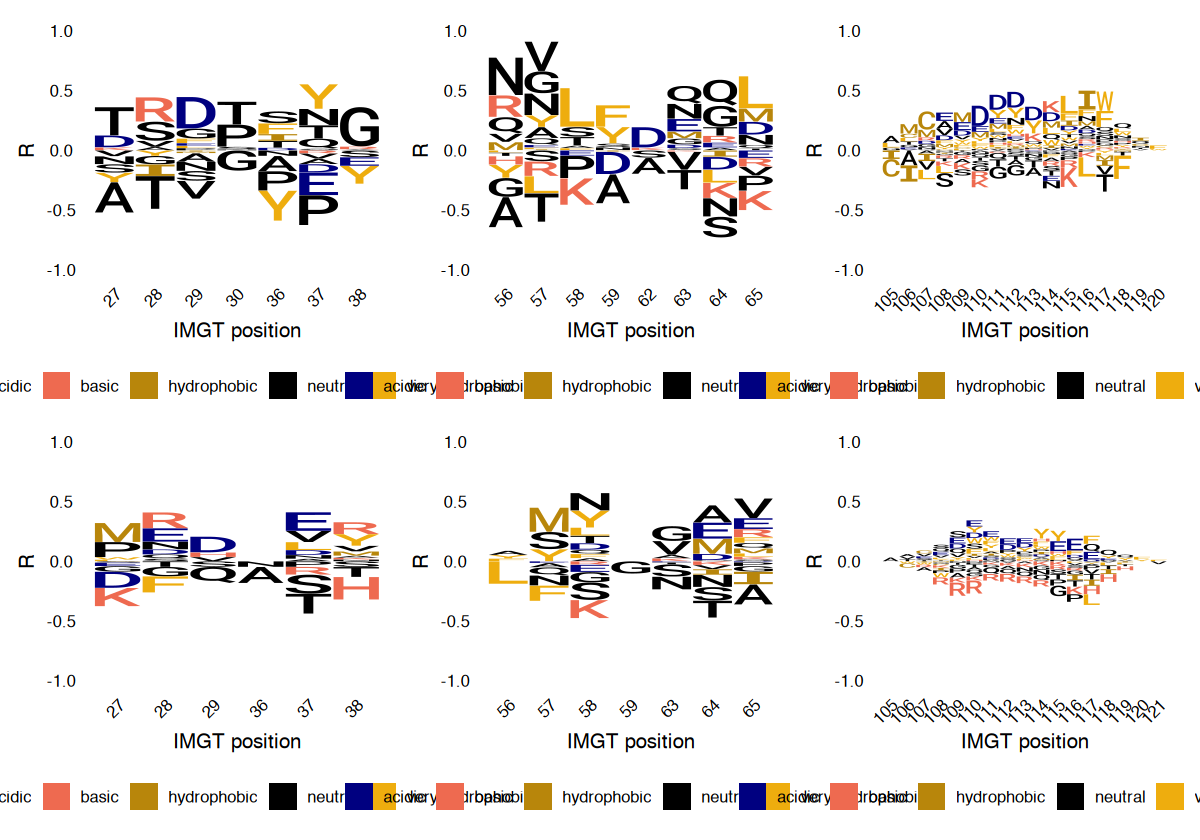

In [37]:
tar2 = arrange_score_comps("target2", cdrscore_dir = "glmnet_predscorebyCDR_0606", fullscore_dir = "glmnetres_4targets_fixnames_0604")
options(repr.plot.width=5, repr.plot.height=3)
plot_var_comp(get_var_comps_LR(tar2))
options(repr.plot.width=10, repr.plot.height=7)
viz_all_posTCRcors(tcrcors[tcrcors$CV=="X2",], ymin=-1, ymax=1)

## Figure 2l: *TCR-reg*

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



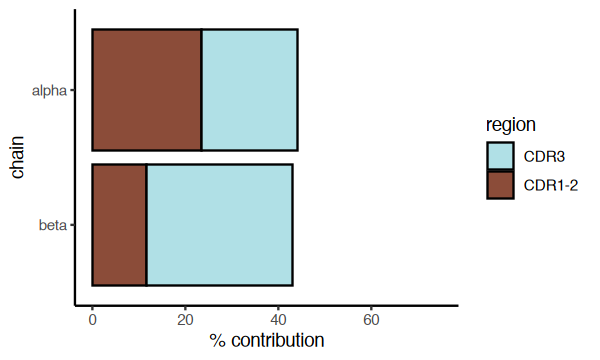

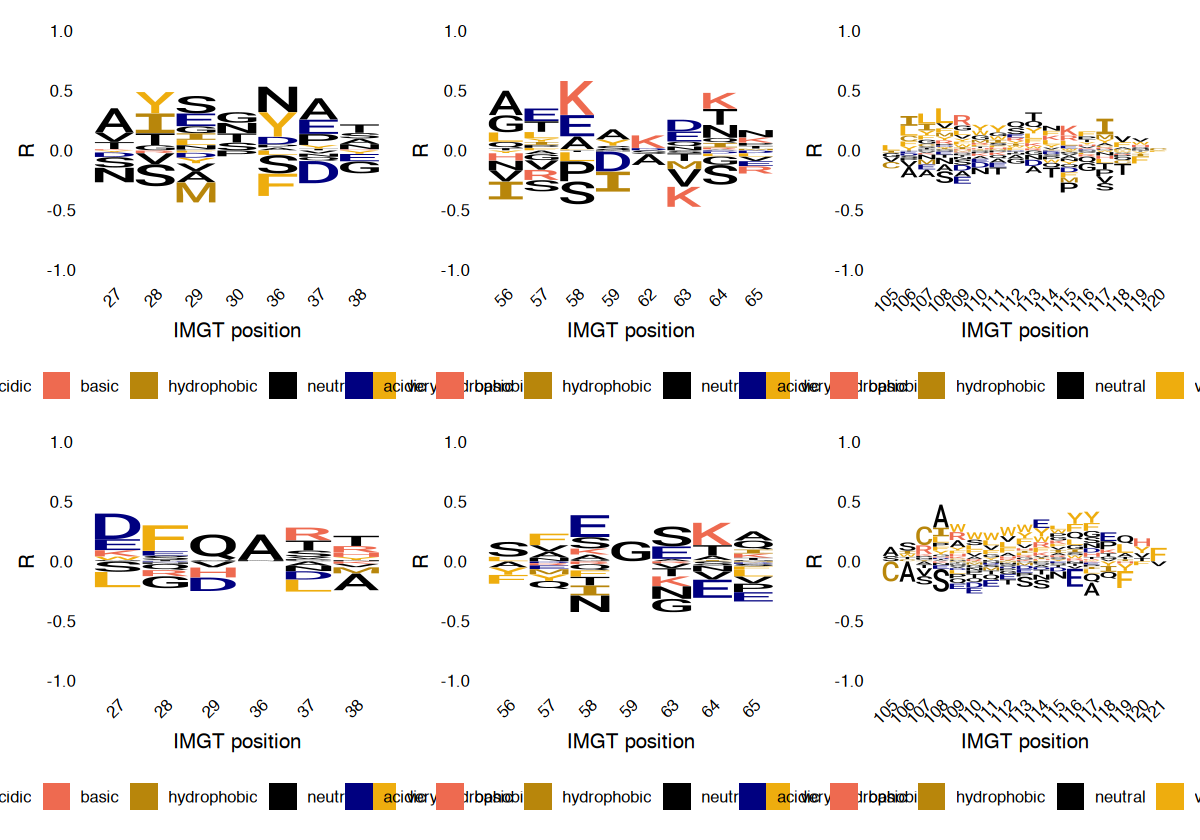

In [39]:
tar3 = arrange_score_comps("target3", cdrscore_dir = "glmnet_predscorebyCDR_0606", fullscore_dir = "glmnetres_4targets_fixnames_0604")
options(repr.plot.width=5, repr.plot.height=3)
plot_var_comp(get_var_comps_LR(tar3))
options(repr.plot.width=10, repr.plot.height=7)
viz_all_posTCRcors(tcrcors[tcrcors$CV=="X3",], ymin=-1, ymax=1)

## Figure 2m: *TCR-mem*

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



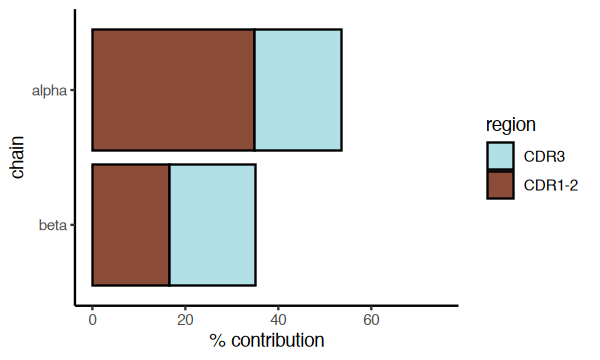

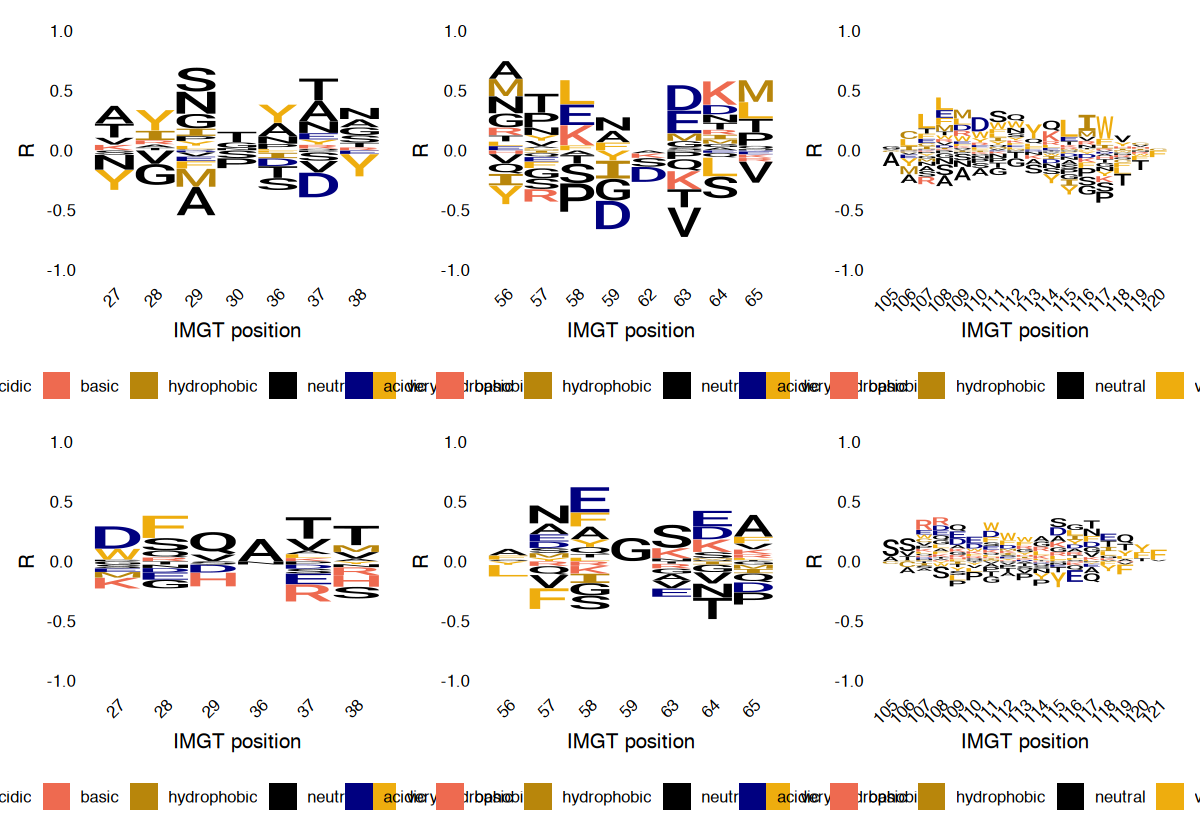

In [40]:
tar4 = arrange_score_comps("target4", cdrscore_dir = "glmnet_predscorebyCDR_0606", fullscore_dir = "glmnetres_4targets_fixnames_0604")
options(repr.plot.width=5, repr.plot.height=3)
plot_var_comp(get_var_comps_LR(tar4))
options(repr.plot.width=10, repr.plot.height=7)
viz_all_posTCRcors(tcrcors[tcrcors$CV=="X4",], ymin=-1, ymax=1)